# 1. Data Collection:

> Import Libraries

In [75]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

> Loading Dataset

In [76]:
sales = pd.read_csv('Global_Superstore2.csv' ,encoding='latin-1')
sales.shape

(51290, 24)

> Discribe Dataset

In [77]:
sales.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


> Drop useless Columns

In [78]:
sales.drop(columns=['Row ID' ,'Order ID' ,'Customer ID','Postal Code','Product ID'] ,inplace=True)

In [79]:
# Convert Order Date to DateTime
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# Convert Ship Date to Date time
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_7324\259958964.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales['Order Date'] = pd.to_datetime(sales['Order Date'])
C:\Users\FreeComp\AppData\Local\Temp\ipykernel_7324\259958964.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])


> Add the missed featuers

In [80]:
sales['Month'] = sales['Order Date'].dt.month
sales['Quarter'] = sales['Order Date'].dt.quarter 
sales['Year'] = sales['Order Date'].dt.year
sales['Day_of_Week'] = sales['Order Date'].dt.dayofweek
sales['Is_Weekend'] = sales['Day_of_Week'].isin([5, 6]).astype(int)  # 5 and 6 correspond to Fri and Sat


In [81]:
from pandas.tseries.holiday import USFederalHolidayCalendar

# Add holiday feature
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=sales['Order Date'].min(), end=sales['Order Date'].max())
sales['Is_Holiday'] = sales['Order Date'].isin(holidays).astype(int)

In [82]:
# Add season feature
sales['Season'] = sales['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                                'Spring' if x in [3, 4, 5] else
                                                'Summer' if x in [6, 7, 8] else
                                                'Fall')

# Add total sales feature
sales['Total_sales'] = (sales['Sales']) * (sales['Quantity'])

In [83]:
sales['Season'] = sales['Season'].astype('category')

# 2. Data Exploration:

### • Investigate relationships between product types, promotional activities, and sales volume. In addition to understanding sales trends, seasonality, and external factors influencing demand.

> 1. Number of records in the dataset

In [84]:
num_records = sales.shape[0]
print(f"> Number of records in the dataset: {num_records}")

> Number of records in the dataset: 51290


> 2. Total sales revenue

In [85]:
total_sales = sales['Sales'].sum()
print(f"> Total Sales Revenue: ${total_sales:,.2f}")

> Total Sales Revenue: $12,642,501.91


> 3. Total profit

In [86]:
total_profit = sales['Profit'].sum()
print(f"> Total Profit: ${total_profit:,.2f}")

> Total Profit: $1,467,457.29


> 4. Total discounts given

In [87]:
total_discounts = sales['Discount'].sum()
print(f"> Total Discounts Given: {total_discounts:.2f}")

> Total Discounts Given: 7329.73


> 5. Average sales per order

In [88]:
average_sales = sales['Sales'].mean()
print(f"> Average Sales per Order: ${average_sales:.2f}")

> Average Sales per Order: $246.49


> 6. Highest selling category

In [89]:
category_sales = sales.groupby('Category')['Sales'].sum().round(2).sort_values(ascending=False)
category_sales = pd.DataFrame(category_sales).reset_index()
category_sales.index += 1
category_sales

,Category,Sales
1,Technology,4744557.50
2,Furniture,4110874.19
3,Office Supplies,3787070.23


> 7. Highest selling sub-category

In [90]:
subcategory_sales = sales.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
subcategory_sales = pd.DataFrame(subcategory_sales).reset_index()
subcategory_sales.index += 1
subcategory_sales.head()

,Sub-Category,Sales
1,Phones,1.706824e+06
2,Copiers,1.509436e+06
3,Chairs,1.501682e+06
4,Bookcases,1.466572e+06
5,Storage,1.127086e+06


> 8. Most sold sub-category by quantity

In [91]:
subcategory_quantity = sales.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)
subcategory_quantity = pd.DataFrame(subcategory_quantity).reset_index()
subcategory_quantity.index +=1
subcategory_quantity.head()

,Sub-Category,Quantity
1,Binders,21429
2,Storage,16917
3,Art,16301
4,Paper,12822
5,Chairs,12336


> 9. Impact of discounts on sales

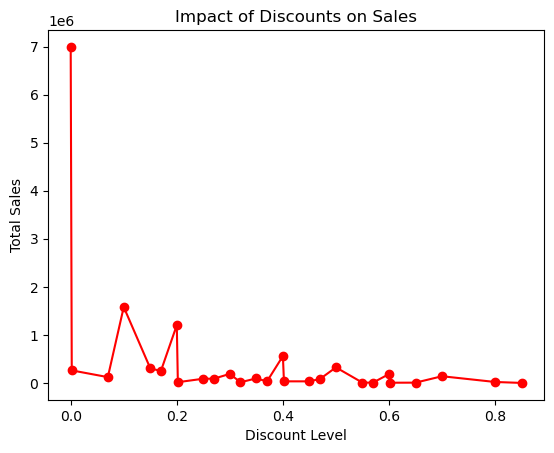

In [92]:
discount_impact = sales.groupby('Discount')['Sales'].sum()
plt.plot(discount_impact.index, discount_impact.values, marker='o', color='red')
plt.xlabel('Discount Level')
plt.ylabel('Total Sales')
plt.title('Impact of Discounts on Sales')
plt.show()

> 10. Preferred shipping mode

In [93]:
shipping_mode = sales['Ship Mode'].value_counts()
shipping_mode = pd.DataFrame(shipping_mode)
shipping_mode

,count
Ship Mode,
Standard Class,30775
Second Class,10309
First Class,7505
Same Day,2701


> 11. Sales performance by region

In [94]:
region_sales = sales.groupby('Region')['Sales'].sum().round(2).sort_values(ascending=False)
region_sales = pd.DataFrame(region_sales)
region_sales

,Sales
Region,
Central,2822302.52
South,1600907.04
North,1248165.60
Oceania,1100184.61
Southeast Asia,884423.17
North Asia,848309.78
EMEA,806161.31
Africa,783773.21
Central Asia,752826.57


> 12. Profit distribution across regions

In [95]:
region_profit = sales.groupby('Region')['Profit'].sum().round(2).sort_values(ascending=False)
region_profit = pd.DataFrame(region_profit)
region_profit

,Profit
Region,
Central,311403.98
North,194597.95
North Asia,165578.42
South,140355.77
Central Asia,132480.19
Oceania,120089.11
West,108418.45
East,91522.78
Africa,88871.63


> 13. Top 5 most profitable products

In [96]:
top_profitable_products = sales.groupby('Product Name')['Profit'].sum().round(2).sort_values(ascending=False).head()
top_profitable_products = pd.DataFrame(top_profitable_products).reset_index()
top_profitable_products.index += 1
top_profitable_products

,Product Name,Profit
1,Canon imageCLASS 2200 Advanced Copier,25199.93
2,"Cisco Smart Phone, Full Size",17238.52
3,"Motorola Smart Phone, Full Size",17027.11
4,"Hoover Stove, Red",11807.97
5,"Sauder Classic Bookcase, Traditional",10672.07


> 14. Top 5 least profitable products

In [97]:
least_profitable_products = sales.groupby('Product Name')['Profit'].sum().sort_values().head(5)
least_profitable_products = pd.DataFrame(least_profitable_products).reset_index()
least_profitable_products.index += 1
least_profitable_products

,Product Name,Profit
1,Cubify CubeX 3D Printer Double Head Print,-8879.9704
2,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
3,"Motorola Smart Phone, Cordless",-4447.0380
4,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
5,"Bevis Round Table, Adjustable Height",-3649.8940


> 15. Customer segmentation by total sales

In [98]:
customer_sales = sales.groupby('Customer Name')['Sales'].sum().round(2).sort_values(ascending=False).head(10)
customer_sales = pd.DataFrame(customer_sales).reset_index()
customer_sales.index += 1
print("Top 10 Customers by Total Sales:")
customer_sales

Top 10 Customers by Total Sales:


,Customer Name,Sales
1,Tom Ashbrook,40488.07
2,Tamara Chand,37457.33
3,Greg Tran,35550.95
4,Christopher Conant,35187.08
5,Sean Miller,35170.93
6,Bart Watters,32310.45
7,Natalie Fritzler,31781.26
8,Fred Hopkins,30400.67
9,Jane Waco,30288.45
10,Hunter Lopez,30243.57


> 16. Average order value per region

In [99]:
region_avg_order = sales.groupby('Region')['Sales'].mean().round(2).sort_values(ascending=False)
region_avg_order = pd.DataFrame(region_avg_order)
region_avg_order

,Sales
Region,
Central Asia,367.59
North Asia,362.84
Oceania,315.51
Southeast Asia,282.65
North,260.85
Central,253.87
South,240.92
East,238.34
West,226.49


> 17. Relationship between sales and profit

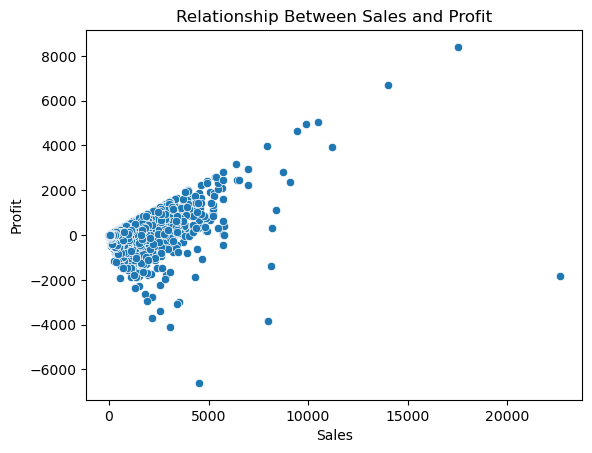

In [100]:
sns.scatterplot(x = sales['Sales'], y = sales['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Relationship Between Sales and Profit')
plt.show()

> 18. Monthly sales trends

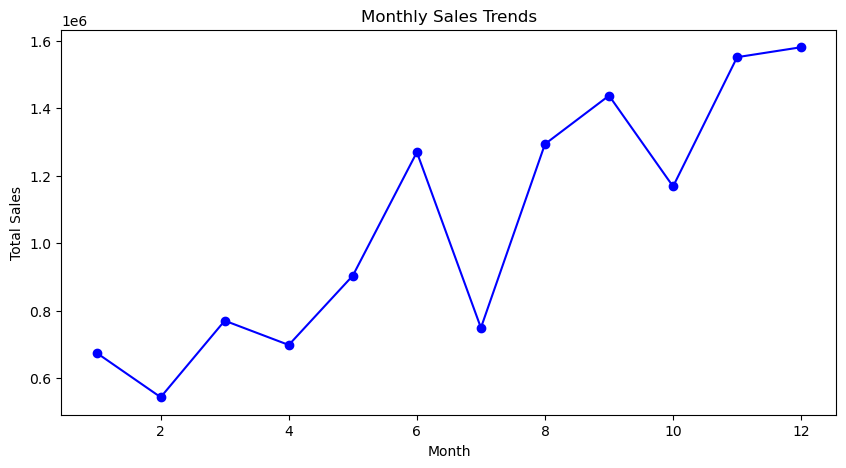

In [101]:
monthly_sales = sales.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o', linestyle='-', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.show()

> 19. Sales contribution by customer segment

In [102]:
segment_sales = sales.groupby('Segment')['Sales'].sum().round(2).sort_values(ascending=False)
segment_sales = pd.DataFrame(segment_sales)
segment_sales

,Sales
Segment,
Consumer,6507949.42
Corporate,3824697.52
Home Office,2309854.97


> 20. Impact of shipping mode on profit

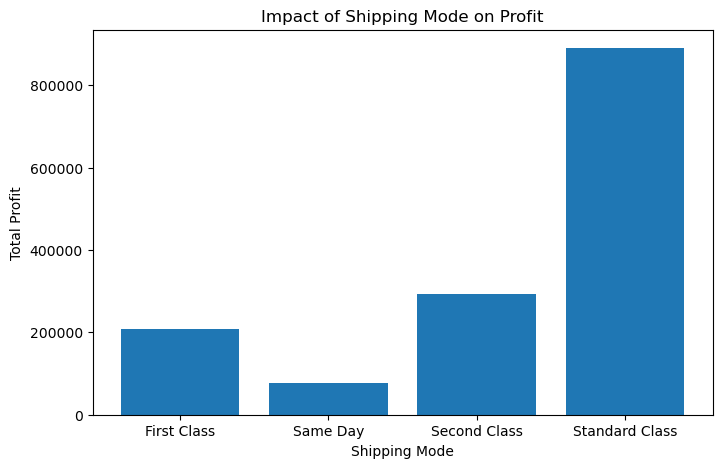

In [103]:
shipping_profit = sales.groupby('Ship Mode')['Profit'].sum()
plt.figure(figsize=(8, 5))
plt.bar(shipping_profit.index, shipping_profit.values)
plt.xlabel('Shipping Mode')
plt.ylabel('Total Profit')
plt.title('Impact of Shipping Mode on Profit')
plt.show()

> 21. Identify the average discount applied per category

In [104]:
avg_discount_category = sales.groupby('Category')['Discount'].mean().round(4)
avg_discount_category = pd.DataFrame(avg_discount_category)
avg_discount_category

,Discount
Category,
Furniture,0.1681
Office Supplies,0.1374
Technology,0.1353


> 22. Identify the most frequently purchased product

In [105]:
most_frequent_product = sales['Product Name'].value_counts().idxmax()
print(f"> Most Frequently Purchased Product: {most_frequent_product}")

> Most Frequently Purchased Product: Staples


> 23. Identify top 5 cities with highest sales

In [106]:
top_cities_sales = sales.groupby('City')['Sales'].sum().round(2).sort_values(ascending=False).head(5)
top_cities_sales = pd.DataFrame(top_cities_sales).reset_index()
top_cities_sales.index += 1
print("Top 5 Cities with Highest Sales:")
top_cities_sales

Top 5 Cities with Highest Sales:


,City,Sales
1,New York City,256368.16
2,Los Angeles,175851.34
3,Manila,120886.95
4,Seattle,119540.74
5,San Francisco,112669.09


> 24. Compare sales & profit on holidays vs. non-holidays

In [107]:
holiday_impact = sales.groupby("Is_Holiday")[["Sales", "Profit"]].mean().round(2)
holiday_impact = pd.DataFrame(holiday_impact)
print("Average Sales & Profit: Holiday vs. Non-Holiday:")
holiday_impact

Average Sales & Profit: Holiday vs. Non-Holiday:


,Sales,Profit
Is_Holiday,,
0,245.72,28.42
1,267.77,33.93


> 25. Compare weekend vs. weekday sales

In [108]:
weekend_impact = sales.groupby("Is_Weekend")[["Sales", "Profit"]].sum().round(3)
weekend_impact = pd.DataFrame(weekend_impact)
print("Average Sales & Profit: Weekend vs. Weekday:")
weekend_impact

Average Sales & Profit: Weekend vs. Weekday:


,Sales,Profit
Is_Weekend,,
0,1.124223e+07,1300436.911
1,1.400268e+06,167020.381


> 26. The top 5 best-selling products

In [109]:
top_products = sales.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(5)
top_products = pd.DataFrame(top_products)
print("\nTop 5 Most Ordered Products:\n")
top_products


Top 5 Most Ordered Products:



,Quantity
Product Name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259


> 27. The least sold products

In [110]:
least_products = sales.groupby("Product Name")["Quantity"].sum().sort_values().head(5)
least_products = pd.DataFrame(least_products)
print("\nLeast Ordered Products:\n") 
least_products


Least Ordered Products:



,Quantity
Product Name,
Penpower WorldCard Pro Card Scanner,1
Boston 1900 Electric Pencil Sharpener,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
"Chromcraft Training Table, Adjustable Height",1
Xerox 20,1


> 28. Compare profit for discounted vs. non-discounted sales

In [111]:
discount_impact = sales.groupby(sales["Discount"] > 0)["Profit"].mean().round(2)
discount_impact = pd.DataFrame(discount_impact)
print("\nAverage Profit for Discounted vs. Non-Discounted Sales:\n")
discount_impact


Average Profit for Discounted vs. Non-Discounted Sales:



,Profit
Discount,
False,61.04
True,-13.61


> 29. Average shipping cost per season 

In [112]:
seasonal_shipping = sales.groupby("Season", observed=False)["Shipping Cost"].mean().sort_values(ascending=False)
seasonal_shipping = pd.DataFrame(seasonal_shipping)
print("\nAverage Shipping Cost by Season:\n")
seasonal_shipping


Average Shipping Cost by Season:



,Shipping Cost
Season,
Winter,27.285037
Fall,26.265491
Summer,26.255096
Spring,25.708465


> 30. Average shipping cost by season

In [113]:
seasonal_shipping = sales.groupby("Season", observed=True)["Shipping Cost"].mean().sort_values(ascending=False)
seasonal_shipping = pd.DataFrame(seasonal_shipping)
print("\nAverage Shipping Cost by Season:\n")
seasonal_shipping


Average Shipping Cost by Season:



,Shipping Cost
Season,
Winter,27.285037
Fall,26.265491
Summer,26.255096
Spring,25.708465


> 31. States with highest shipping costs

In [114]:
high_shipping_states = sales.groupby("State")["Shipping Cost"].mean().sort_values(ascending=False).head(5)
high_shipping_states = pd.DataFrame(high_shipping_states)
print("\nStates with Highest Average Shipping Cost:\n")
high_shipping_states


States with Highest Average Shipping Cost:



,Shipping Cost
State,
Paysandú,634.530
Elbasan,301.730
Hidalgo,229.865
Bekes,190.315
Sikasso,184.600


> 32. Potential returns/cancellations if refund-related data exists

In [115]:
if "Return Status" in sales.columns:
    return_orders = sales["Return Status"].value_counts()
    print("\nOrder Return & Cancellation Breakdown:\n", return_orders)
else:
    print("No returns")

No returns


> 33. Compare average monthly & quarterly sales

In [116]:
avg_monthly_sales = sales.groupby("Month")["Sales"].mean().sort_values(ascending=False)
avg_monthly_sales = pd.DataFrame(avg_monthly_sales)
avg_quarterly_sales = sales.groupby("Quarter")["Sales"].mean().sort_values(ascending=False)
avg_quarterly_sales = pd.DataFrame(avg_quarterly_sales)

print("\nAverage Sales by Month:\n")
avg_monthly_sales


Average Sales by Month:



,Sales
Month,
10,260.174696
1,259.766707
8,254.791880
3,253.871809
12,250.837952
2,250.802297
11,244.603807
5,241.262967
9,240.565709


In [117]:
print("\nAverage Sales by Quarter:\n")
avg_quarterly_sales


Average Sales by Quarter:



,Sales
Quarter,
1,254.982568
4,250.977151
3,244.784803
2,236.694710


> 34. Fastest and Slowest deliveries

In [118]:
# Convert dates to datetime if not already done
sales["Ship Date"] = pd.to_datetime(sales["Ship Date"])
sales["Order Date"] = pd.to_datetime(sales["Order Date"])

# Calculate shipping duration
sales["Shipping Time (Days)"] = (sales["Ship Date"] - sales["Order Date"]).dt.days

# Find fastest and slowest deliveries
fastest_shipping = sales.sort_values(by="Shipping Time (Days)").head(5)
slowest_shipping = sales.sort_values(by="Shipping Time (Days)", ascending=False).head(5)

print("\nTop 5 Fastest Shipped Orders:\n")
fastest_shipping[["Order Date", "Ship Date", "Ship Mode", "Shipping Time (Days)"]]



Top 5 Fastest Shipped Orders:



,Order Date,Ship Date,Ship Mode,Shipping Time (Days)
0,2012-07-31,2012-07-31,Same Day,0
2354,2014-11-11,2014-11-11,Same Day,0
12704,2012-07-06,2012-07-06,Same Day,0
12699,2013-09-27,2013-09-27,Same Day,0
12692,2014-11-10,2014-11-10,Same Day,0


In [119]:
print("\nTop 5 Slowest Shipped Orders:\n")
slowest_shipping[["Order Date", "Ship Date", "Ship Mode", "Shipping Time (Days)"]]


Top 5 Slowest Shipped Orders:



,Order Date,Ship Date,Ship Mode,Shipping Time (Days)
15060,2014-04-03,2014-04-10,Standard Class,7
5025,2014-06-12,2014-06-19,Standard Class,7
31905,2014-05-08,2014-05-15,Standard Class,7
37990,2012-11-19,2012-11-26,Standard Class,7
32236,2013-06-10,2013-06-17,Standard Class,7


### • Handle missing values, duplicates, and outliers, and compute basic summary statistics.

#### - Handle Missing Values

> identifying missing values

In [120]:
sales.isna().sum()

Order Date              0
Ship Date               0
Ship Mode               0
Customer Name           0
Segment                 0
City                    0
State                   0
Country                 0
Market                  0
Region                  0
Category                0
Sub-Category            0
Product Name            0
Sales                   0
Quantity                0
Discount                0
Profit                  0
Shipping Cost           0
Order Priority          0
Month                   0
Quarter                 0
Year                    0
Day_of_Week             0
Is_Weekend              0
Is_Holiday              0
Season                  0
Total_sales             0
Shipping Time (Days)    0
dtype: int64

#### - Handle Duplicates values

>Identifying Duplicates Values

In [121]:
sales.duplicated().sum()

0

#### - Handle Outliers

> Identifying outliers values

<Axes: ylabel='Sales'>

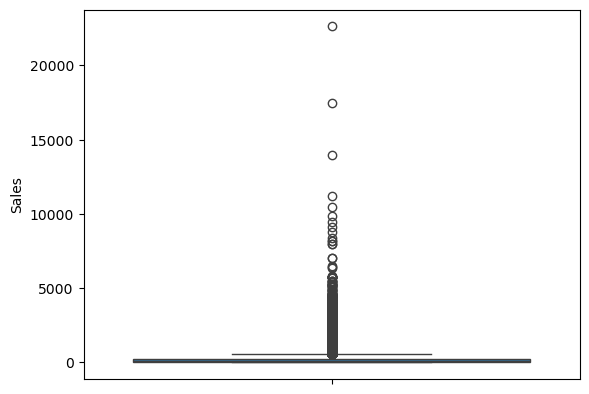

In [122]:
sns.boxplot(sales['Sales'])

> Calculate IQR (Interquartile Range) and Define the lower and upper bounds for outliers

In [123]:
Q1 = sales['Sales'].quantile(0.25)
Q3 = sales['Sales'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sales[(sales['Sales'] < lower_bound) | (sales['Sales'] > upper_bound)]
outliers

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales,Shipping Time (Days)
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,...,Critical,7,3,2012,1,0,0,Summer,16167.550,0
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,...,Critical,2,1,2013,1,0,0,Winter,33384.555,2
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,...,Medium,10,4,2013,3,0,0,Fall,46576.539,1
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,...,Medium,1,1,2013,0,0,0,Winter,14462.550,2
4,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,...,Critical,11,4,2013,1,0,0,Fall,22663.680,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44220,2012-01-27,2012-02-02,Standard Class,Muhammed Yedwab,Corporate,Xichang,Sichuan,China,APAC,North Asia,...,Medium,1,1,2012,4,0,0,Winter,14271.390,6
45234,2014-09-15,2014-09-21,Standard Class,Giulietta Weimer,Consumer,Coulommiers,Ile-de-France,France,EU,Central,...,Low,9,3,2014,0,0,0,Fall,2472.336,6
45351,2014-10-23,2014-10-26,First Class,Greg Tran,Consumer,Ulm,Baden-Württemberg,Germany,EU,Central,...,Medium,10,4,2014,3,0,0,Fall,2808.810,3
47131,2014-07-21,2014-07-26,Standard Class,Don Jones,Corporate,Maringá,Parana,Brazil,LATAM,South,...,Medium,7,3,2014,0,0,0,Summer,1214.720,5


> Remove Outliers 

In [124]:
sales = sales[(sales['Sales'] >= lower_bound) & (sales['Sales'] <= upper_bound)]
sales.shape

(45635, 28)

#### - Basic summary statistics

>Summary statistics for numerical features

In [125]:
sales.describe(include=['number'])

,Sales,Quantity,Discount,Profit,Shipping Cost,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Total_sales,Shipping Time (Days)
count,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000
mean,121.659859,3.263789,0.148033,10.191308,13.255351,7.513246,2.789942,2012.779796,2.339301,0.107856,0.034162,470.819580,3.973507
std,131.533247,2.155229,0.218058,64.842801,18.916822,3.299716,1.065835,1.098096,1.670798,0.310202,0.181648,711.572183,1.727547
min,0.444000,1.000000,0.000000,-1924.542000,0.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.444000,0.000000
25%,27.180000,2.000000,0.000000,-0.013200,2.280000,5.000000,2.000000,2012.000000,1.000000,0.000000,0.000000,56.240000,3.000000
50%,67.080000,3.000000,0.000000,7.703100,6.250000,8.000000,3.000000,2013.000000,2.000000,0.000000,0.000000,190.980000,4.000000
75%,168.600000,4.000000,0.200000,26.661600,16.410000,10.000000,4.000000,2014.000000,4.000000,0.000000,0.000000,563.499000,5.000000
max,581.400000,14.000000,0.850000,284.220000,246.050000,12.000000,4.000000,2014.000000,6.000000,1.000000,1.000000,7938.000000,7.000000


>Summary statistics for categorical features

In [126]:
sales.describe(include=['object', 'category'])

,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Order Priority,Season
count,45635,45635,45635,45635,45635,45635,45635,45635,45635,45635,45635,45635,45635
unique,4,795,3,3563,1085,147,7,13,3,17,3678,4,4
top,Standard Class,Steven Ward,Consumer,New York City,California,United States,LATAM,Central,Office Supplies,Binders,Staples,Medium,Fall
freq,27400,97,23630,805,1802,9013,9335,9831,30196,6073,227,26212,14902


>Summary statistics for datetime features

In [127]:
sales.describe(include=['datetime'])

,Order Date,Ship Date
count,45635,45635
mean,2013-05-12 13:16:28.372959232,2013-05-16 12:38:19.393009664
min,2011-01-01 00:00:00,2011-01-03 00:00:00
25%,2012-06-20 00:00:00,2012-06-24 00:00:00
50%,2013-07-10 00:00:00,2013-07-14 00:00:00
75%,2014-05-22 00:00:00,2014-05-26 00:00:00
max,2014-12-31 00:00:00,2015-01-07 00:00:00


>Summary statistics for all features

In [128]:
sales.describe(include='all')

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales,Shipping Time (Days)
count,45635,45635,45635,45635,45635,45635,45635,45635,45635,45635,...,45635,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635,45635.000000,45635.000000
unique,NaN,NaN,4,795,3,3563,1085,147,7,13,...,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,NaN,NaN,Standard Class,Steven Ward,Consumer,New York City,California,United States,LATAM,Central,...,Medium,NaN,NaN,NaN,NaN,NaN,NaN,Fall,NaN,NaN
freq,NaN,NaN,27400,97,23630,805,1802,9013,9335,9831,...,26212,NaN,NaN,NaN,NaN,NaN,NaN,14902,NaN,NaN
mean,2013-05-12 13:16:28.372959232,2013-05-16 12:38:19.393009664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.513246,2.789942,2012.779796,2.339301,0.107856,0.034162,NaN,470.819580,3.973507
min,2011-01-01 00:00:00,2011-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,NaN,0.444000,0.000000
25%,2012-06-20 00:00:00,2012-06-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.000000,2.000000,2012.000000,1.000000,0.000000,0.000000,NaN,56.240000,3.000000
50%,2013-07-10 00:00:00,2013-07-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.000000,3.000000,2013.000000,2.000000,0.000000,0.000000,NaN,190.980000,4.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.000000,4.000000,2014.000000,4.000000,0.000000,0.000000,NaN,563.499000,5.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.000000,4.000000,2014.000000,6.000000,1.000000,1.000000,NaN,7938.000000,7.000000


# 3. Preprocessing and Feature Engineering:

### • Manage outliers, especially in sales data. 

### • Create relevant features like time-based features (e.g., month, week, day), product categories, and promotion flags.

> Data Befor Creating Features

In [129]:
sales = pd.DataFrame(sales)

print("Real Data:")
sales.head()

Real Data:


,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales,Shipping Time (Days)
685,2013-09-24,2013-09-24,Same Day,Hilary Holden,Corporate,Dar es Salaam,Dar Es Salaam,Tanzania,Africa,Africa,...,Critical,9,3,2013,1,0,0,Fall,4427.520,0
815,2011-11-23,2011-11-25,First Class,Becky Martin,Consumer,Jakarta,Jakarta,Indonesia,APAC,Southeast Asia,...,Critical,11,4,2011,2,0,0,Fall,2369.235,2
844,2011-11-28,2011-11-30,First Class,Sung Chung,Consumer,Monclova,Coahuila,Mexico,LATAM,North,...,Critical,11,4,2011,0,0,0,Fall,1599.660,2
865,2014-09-02,2014-09-04,First Class,Alejandro Grove,Consumer,Prague,Prague,Czech Republic,EMEA,EMEA,...,Critical,9,3,2014,1,0,0,Fall,457.140,2
942,2014-09-17,2014-09-19,First Class,Adam Shillingsburg,Consumer,Philadelphia,Pennsylvania,United States,US,East,...,Critical,9,3,2014,2,0,0,Fall,1076.388,2


> Product Categories
-   One-hot encoding converts categorical variables into numerical representations by creating separate binary columns for each unique category. Each row is assigned a value of 1 in the corresponding category column and 0 elsewhere, allowing machine learning models to process categorical data effectively.

In [130]:
unique_category = sales['Category'].unique()
print("Unique Category:", unique_category)
print()
unique_sub_category = sales['Sub-Category'].unique()
print("Uniqu Sub-Category:", unique_sub_category)

Unique Category: ['Office Supplies' 'Technology' 'Furniture']

Uniqu Sub-Category: ['Appliances' 'Machines' 'Chairs' 'Binders' 'Phones' 'Storage' 'Tables'
 'Copiers' 'Art' 'Accessories' 'Bookcases' 'Furnishings' 'Supplies'
 'Envelopes' 'Paper' 'Fasteners' 'Labels']


In [131]:
sales = pd.get_dummies(sales, columns=['Category'], prefix='Cat')
sales = pd.get_dummies(sales, columns=['Sub-Category'], prefix='Sub')

sales.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Sub_Envelopes,Sub_Fasteners,Sub_Furnishings,Sub_Labels,Sub_Machines,Sub_Paper,Sub_Phones,Sub_Storage,Sub_Supplies,Sub_Tables
685,2013-09-24,2013-09-24,Same Day,Hilary Holden,Corporate,Dar es Salaam,Dar Es Salaam,Tanzania,Africa,Africa,...,False,False,False,False,False,False,False,False,False,False
815,2011-11-23,2011-11-25,First Class,Becky Martin,Consumer,Jakarta,Jakarta,Indonesia,APAC,Southeast Asia,...,False,False,False,False,True,False,False,False,False,False
844,2011-11-28,2011-11-30,First Class,Sung Chung,Consumer,Monclova,Coahuila,Mexico,LATAM,North,...,False,False,False,False,True,False,False,False,False,False
865,2014-09-02,2014-09-04,First Class,Alejandro Grove,Consumer,Prague,Prague,Czech Republic,EMEA,EMEA,...,False,False,False,False,False,False,False,False,False,False
942,2014-09-17,2014-09-19,First Class,Adam Shillingsburg,Consumer,Philadelphia,Pennsylvania,United States,US,East,...,False,False,False,False,False,False,False,False,False,False


> Promotion Flags
- Applying promotion flags creates binary indicators that identify whether a transaction had a discount and whether the discount was above average. This transformation helps in analyzing sales trends and the impact of promotions by distinguishing between discounted and non-discounted transactions.

In [132]:
sales['Promotion_Flag'] = (sales['Discount'] > 0).astype(int)

average_discount = sales['Discount'].mean()
sales['Promotion_Above_Avg'] = (sales['Discount'] > average_discount).astype(int)

print("Data After Promotion Flags:")
sales.head()

Data After Promotion Flags:


,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Sub_Furnishings,Sub_Labels,Sub_Machines,Sub_Paper,Sub_Phones,Sub_Storage,Sub_Supplies,Sub_Tables,Promotion_Flag,Promotion_Above_Avg
685,2013-09-24,2013-09-24,Same Day,Hilary Holden,Corporate,Dar es Salaam,Dar Es Salaam,Tanzania,Africa,Africa,...,False,False,False,False,False,False,False,False,0,0
815,2011-11-23,2011-11-25,First Class,Becky Martin,Consumer,Jakarta,Jakarta,Indonesia,APAC,Southeast Asia,...,False,False,True,False,False,False,False,False,1,1
844,2011-11-28,2011-11-30,First Class,Sung Chung,Consumer,Monclova,Coahuila,Mexico,LATAM,North,...,False,False,True,False,False,False,False,False,0,0
865,2014-09-02,2014-09-04,First Class,Alejandro Grove,Consumer,Prague,Prague,Czech Republic,EMEA,EMEA,...,False,False,False,False,False,False,False,False,0,0
942,2014-09-17,2014-09-19,First Class,Adam Shillingsburg,Consumer,Philadelphia,Pennsylvania,United States,US,East,...,False,False,False,False,False,False,False,False,1,1


> Enhancing Sales Data with Temporal Features
- This code processes sales data by extracting information from the "Order Date" column. First, it converts the date from text to "DateTime" format to make it easier to work with. Then, it extracts the month, week, day of the month, and day of the week from the date. Additionally, it determines the season based on the month and creates a flag to identify holidays (like Christmas or New Year's Day). These steps make it easier to analyze the data over time and understand patterns that impact sales.

In [133]:
# Convert Order Date to DateTime
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# Convert Ship Date to Date time
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])

# Extract Months
sales['Month'] = sales['Order Date'].dt.month

# Extract Weeks
sales['Week'] = sales['Order Date'].dt.isocalendar().week

# Extract Day of The Month
sales['Day_of_Month'] = sales['Order Date'].dt.day

# Extract Day of The Week
sales['Day_of_Week'] = sales['Order Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday


# Identify the Seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

sales['Season'] = sales['Order Date'].dt.month.apply(get_season)

# Holiday Flags
holidays = ['12-25', '01-01']  # Christmas and New Year
sales['Holiday'] = sales['Order Date'].dt.strftime('%m-%d').isin(holidays).astype(int)

sales

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Sub_Paper,Sub_Phones,Sub_Storage,Sub_Supplies,Sub_Tables,Promotion_Flag,Promotion_Above_Avg,Week,Day_of_Month,Holiday
685,2013-09-24,2013-09-24,Same Day,Hilary Holden,Corporate,Dar es Salaam,Dar Es Salaam,Tanzania,Africa,Africa,...,False,False,False,False,False,0,0,39,24,0
815,2011-11-23,2011-11-25,First Class,Becky Martin,Consumer,Jakarta,Jakarta,Indonesia,APAC,Southeast Asia,...,False,False,False,False,False,1,1,47,23,0
844,2011-11-28,2011-11-30,First Class,Sung Chung,Consumer,Monclova,Coahuila,Mexico,LATAM,North,...,False,False,False,False,False,0,0,48,28,0
865,2014-09-02,2014-09-04,First Class,Alejandro Grove,Consumer,Prague,Prague,Czech Republic,EMEA,EMEA,...,False,False,False,False,False,0,0,36,2,0
942,2014-09-17,2014-09-19,First Class,Adam Shillingsburg,Consumer,Philadelphia,Pennsylvania,United States,US,East,...,False,False,False,False,False,1,1,38,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,Same Day,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,...,False,False,False,False,False,0,0,25,19,0
51286,2014-06-20,2014-06-24,Standard Class,Zuschuss Carroll,Consumer,Houston,Texas,United States,US,Central,...,False,False,False,False,False,1,1,25,20,0
51287,2013-12-02,2013-12-02,Same Day,Laurel Beltran,Home Office,Oxnard,California,United States,US,West,...,False,False,False,False,False,0,0,49,2,0
51288,2012-02-18,2012-02-22,Standard Class,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,...,False,False,False,False,False,0,0,7,18,0


### • Encode categorical variables, normalize numerical features, and create lag features (e.g., sales from the previous month). 

# EDA

In [134]:
sales.head(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Sub_Paper,Sub_Phones,Sub_Storage,Sub_Supplies,Sub_Tables,Promotion_Flag,Promotion_Above_Avg,Week,Day_of_Month,Holiday
685,2013-09-24,2013-09-24,Same Day,Hilary Holden,Corporate,Dar es Salaam,Dar Es Salaam,Tanzania,Africa,Africa,...,False,False,False,False,False,0,0,39,24,0
815,2011-11-23,2011-11-25,First Class,Becky Martin,Consumer,Jakarta,Jakarta,Indonesia,APAC,Southeast Asia,...,False,False,False,False,False,1,1,47,23,0


In [135]:
sales.iloc[:5 ,:23]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Discount,Profit,Shipping Cost,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday
685,2013-09-24,2013-09-24,Same Day,Hilary Holden,Corporate,Dar es Salaam,Dar Es Salaam,Tanzania,Africa,Africa,...,0.00,16.5600,246.05,Critical,9,3,2013,1,0,0
815,2011-11-23,2011-11-25,First Class,Becky Martin,Consumer,Jakarta,Jakarta,Indonesia,APAC,Southeast Asia,...,0.17,-5.8530,226.73,Critical,11,4,2011,2,0,0
844,2011-11-28,2011-11-30,First Class,Sung Chung,Consumer,Monclova,Coahuila,Mexico,LATAM,North,...,0.00,69.3000,222.05,Critical,11,4,2011,0,0,0
865,2014-09-02,2014-09-04,First Class,Alejandro Grove,Consumer,Prague,Prague,Czech Republic,EMEA,EMEA,...,0.00,169.1400,218.96,Critical,9,3,2014,1,0,0
942,2014-09-17,2014-09-19,First Class,Adam Shillingsburg,Consumer,Philadelphia,Pennsylvania,United States,US,East,...,0.70,-412.6154,209.30,Critical,9,3,2014,2,0,0


> **check corrolation between num Data**

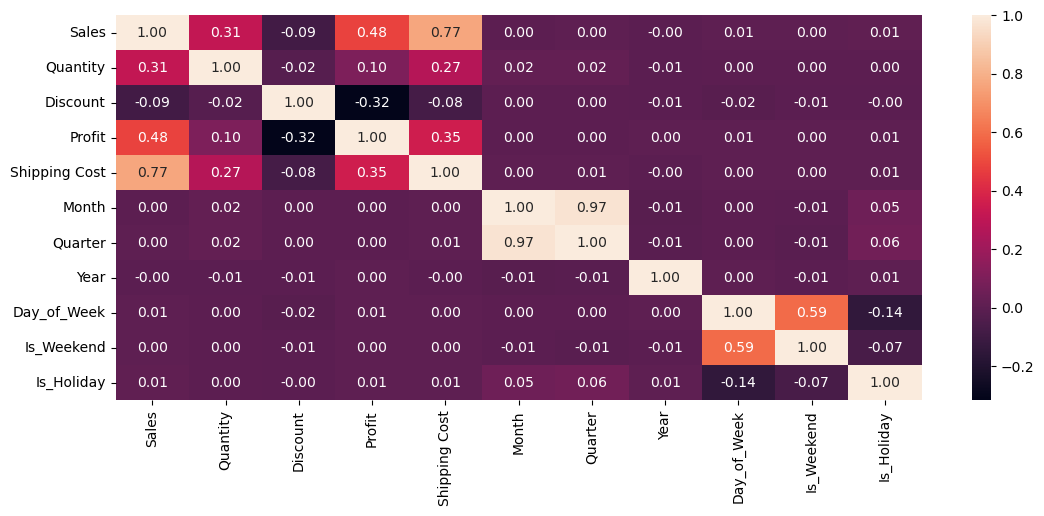

In [243]:
num_cols = sales.select_dtypes(include='number')
plt.figure(figsize=(13,5))
sns.heatmap(num_cols.corr(), annot=True ,fmt='.2f')
plt.show()

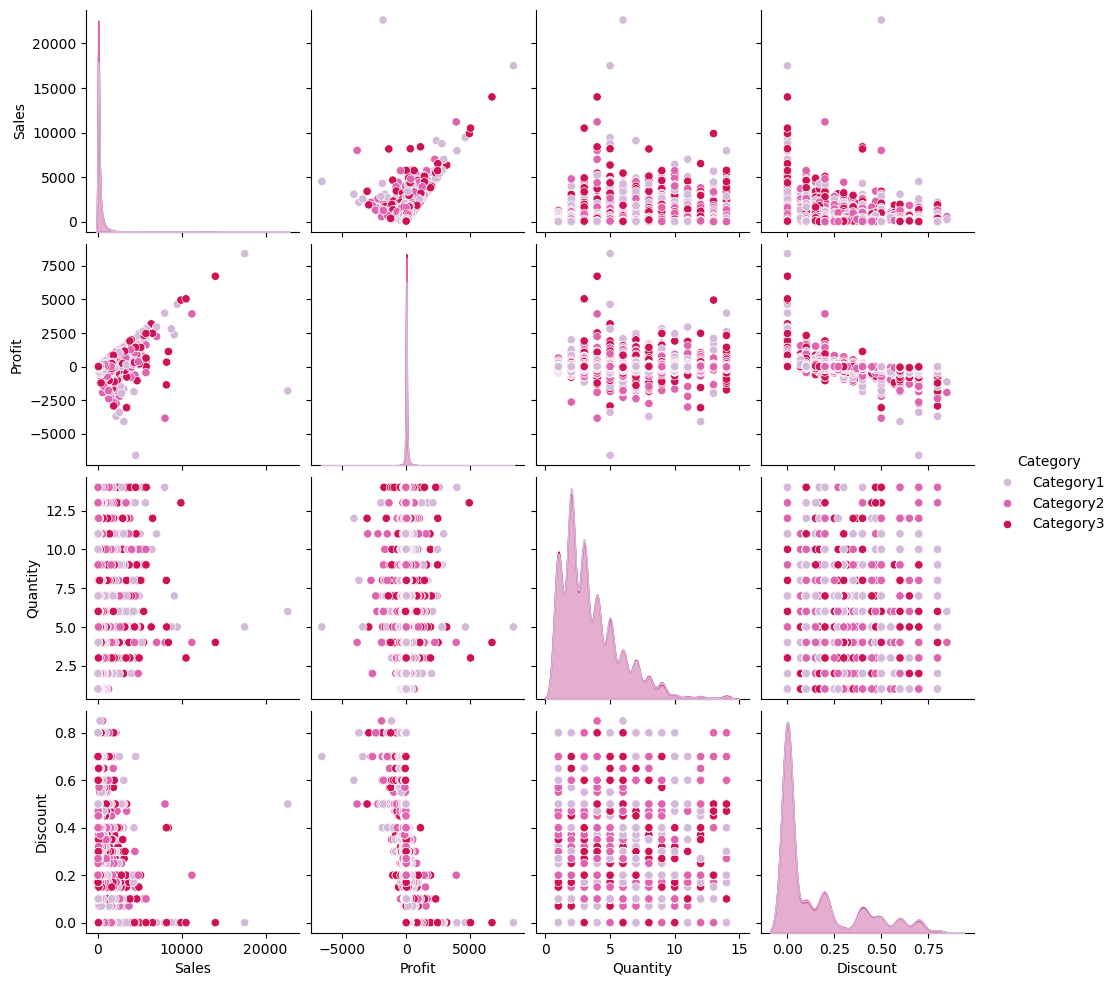

In [283]:
# Example: Creating a random categorical column for demonstration
import numpy as np

# Create a random category column with the same length as sales DataFrame
categories = np.random.choice(['Category1', 'Category2', 'Category3'], size=len(sales))
sales['Category'] = categories

sns.pairplot(sales[['Sales', 'Profit', 'Quantity', 'Discount', 'Category']], hue='Category', palette='PuRd')
plt.show()



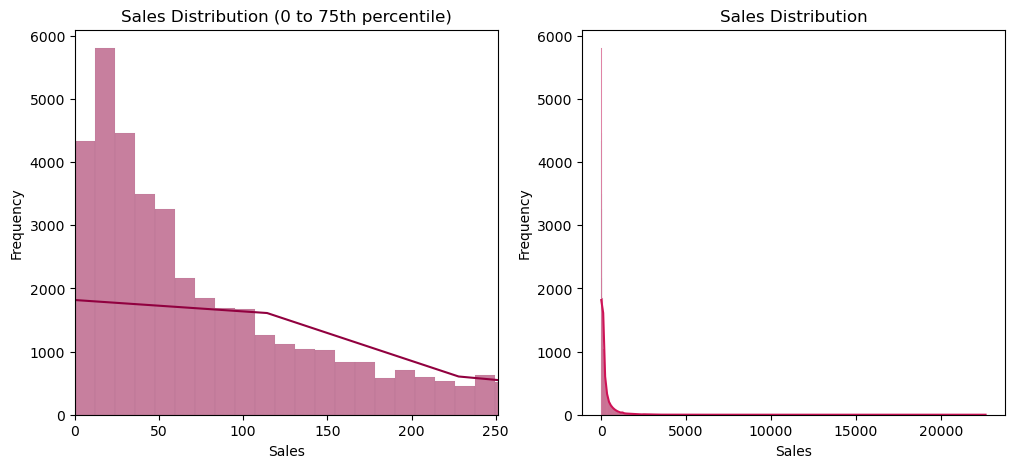

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(sales['Sales'], kde=True, ax=axes[0],color="#91003f")
axes[0].set_xlim(0, sales['Sales'].quantile(0.75))
axes[0].set_title('Sales Distribution (0 to 75th percentile)')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')

sns.histplot(sales['Sales'], kde=True, ax=axes[1], color="#ce1256")
axes[1].set_title('Sales Distribution')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Frequency')

plt.show()

# Demand is more for lower prices

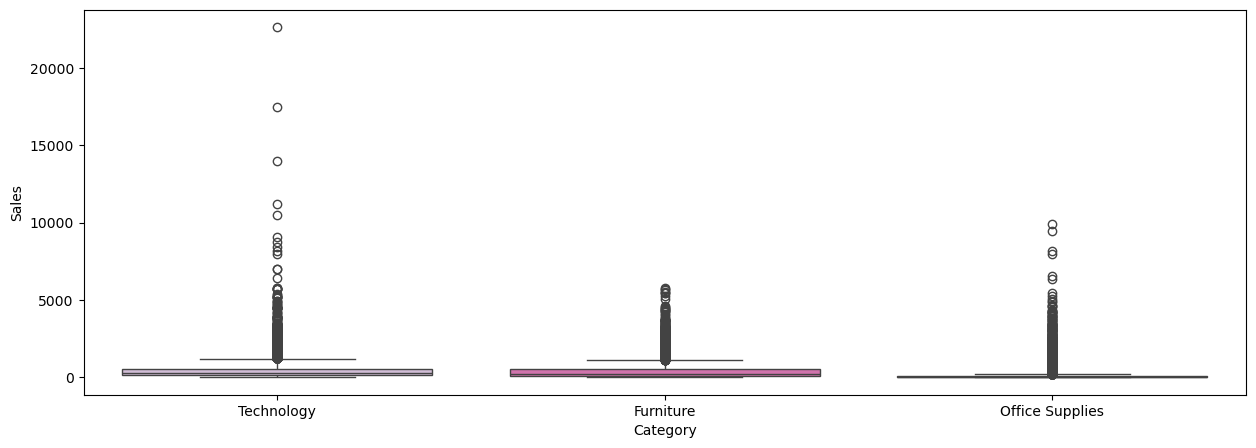

In [265]:
fig ,axes = plt.subplots(figsize=(15,5))
sales['Hue'] = sales['Category']
sns.boxplot(data=sales, x='Category', y='Sales', hue='Hue', palette="PuRd")
plt.show() 

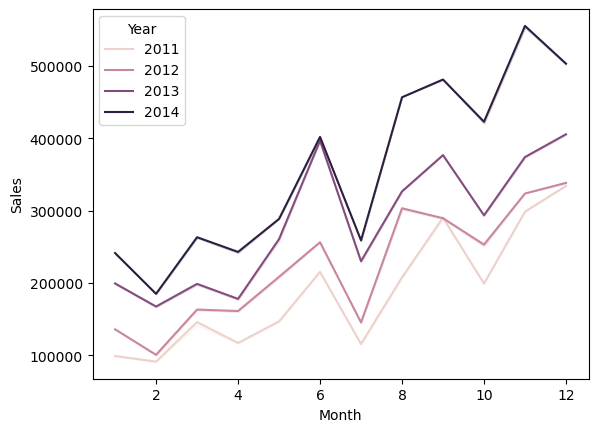

In [51]:
sales = sales.sort_values(by='Order Date')
sns.lineplot(sales ,x='Month' , y='Sales' ,hue='Year' ,errorbar=('ci', False), estimator=sum)
plt.show()

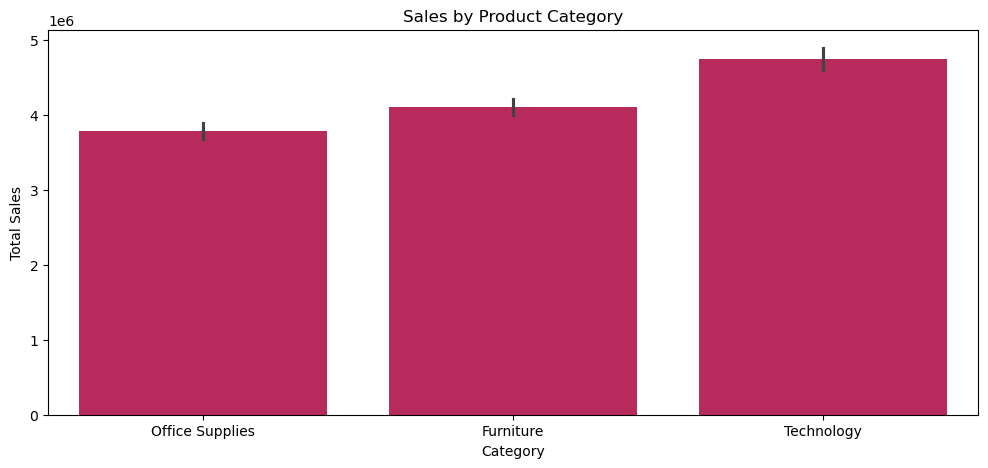

In [239]:
plt.figure(figsize=(12,5))
sns.barplot(x="Category", y="Sales", data=sales, estimator=sum, color="#ce1256")
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


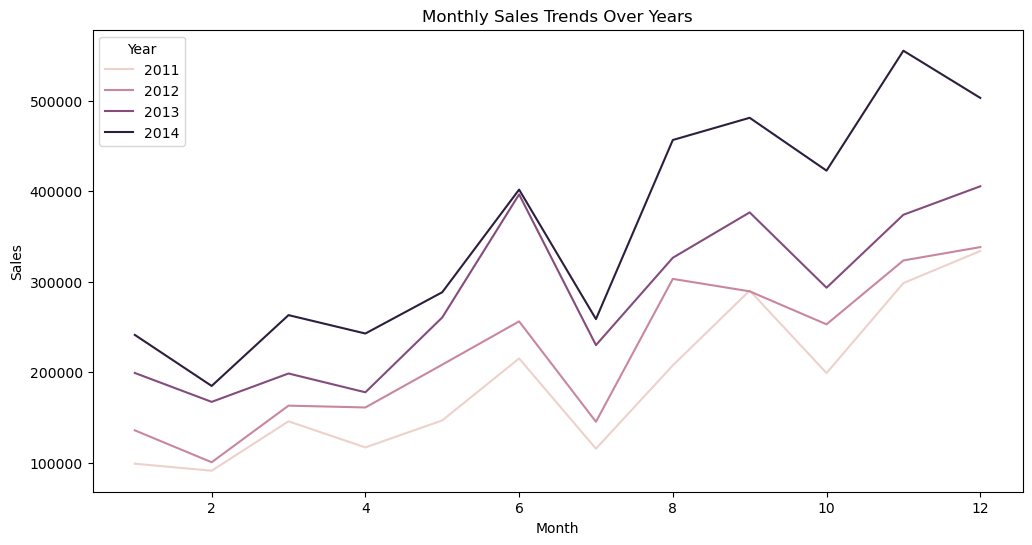

In [61]:
monthly_sales = sales.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year')
plt.title('Monthly Sales Trends Over Years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

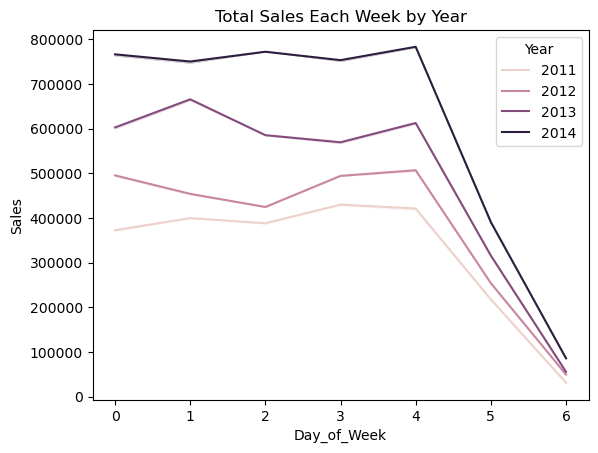

In [49]:
sns.lineplot(sales, x='Day_of_Week', y='Sales', hue='Year', errorbar=('ci', False), estimator=sum)
plt.title('Total Sales Each Week by Year')
plt.show()


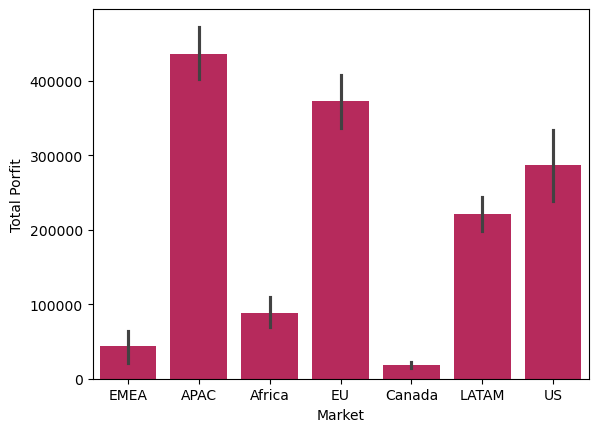

In [177]:
sns.barplot(x='Market' ,y='Profit' ,data=sales , estimator=sum, color="#ce1256")
plt.ylabel('Total Porfit')
plt.show()

# it seems that total profit is higher in the APAC market

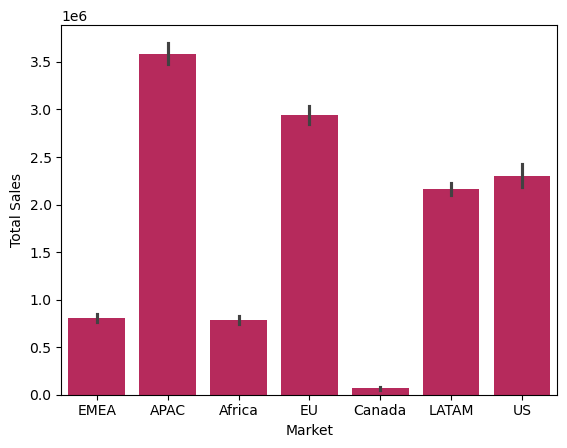

In [183]:
sns.barplot(x='Market' ,y='Sales' ,data=sales , estimator=sum,color="#ce1256")
plt.ylabel('Total Sales')
plt.show()

# it seems that total sales are higher in the APAC market

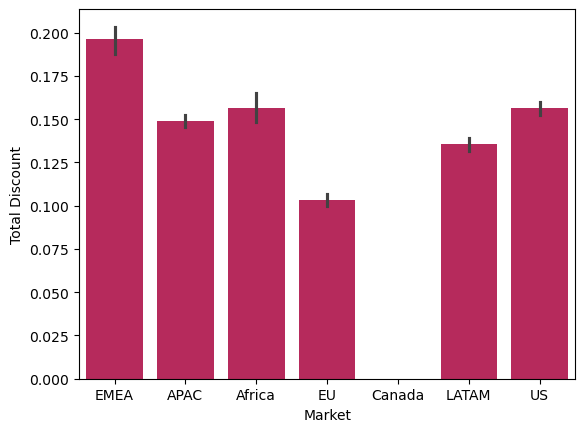

In [185]:
sns.barplot(x='Market' ,y='Discount' ,data=sales,color="#ce1256")
plt.ylabel('Total Discount')
plt.show()

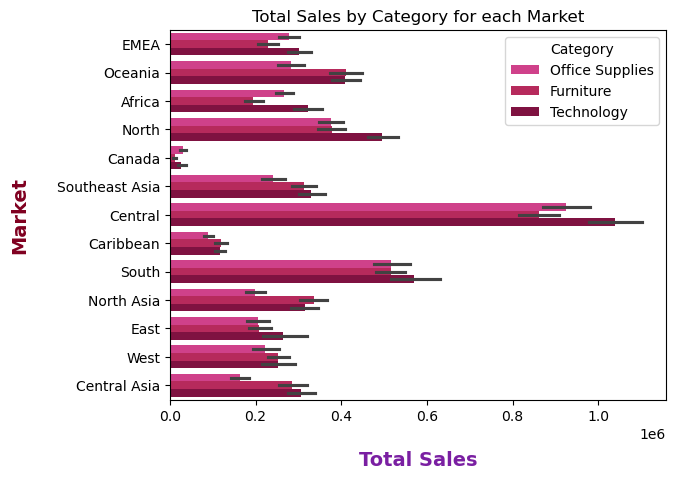

In [207]:
sns.barplot(y='Region' ,x='Sales' ,data=sales ,
            estimator=sum ,hue='Category' ,
            palette=['#e7298a','#ce1256','#91003f'] )


plt.title('Total Sales by Category for each Market')
plt.xlabel('Total Sales', weight = "bold", color ="#7A1FA2", fontsize = 14, labelpad = 20)
plt.ylabel('Market', weight = "bold", color = "#800020", fontsize = 14, labelpad = 20)
plt.show()

# Technology sales is higher than other categoires In most countries

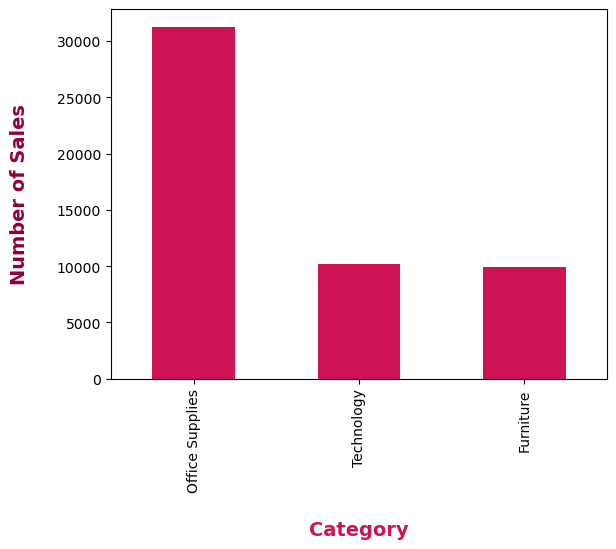

In [211]:
sales['Category'].value_counts().plot(kind='bar',color='#ce1256')
plt.xlabel('Category', weight = "bold", color = "#ce1256", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Sales', weight = "bold", color = "#91003f", fontsize = 14, labelpad = 20);
plt.show()

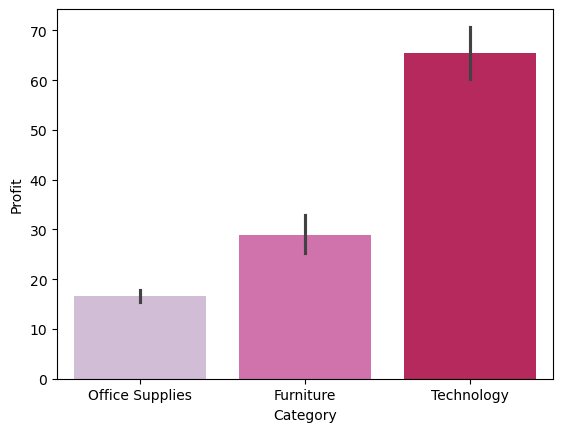

In [217]:
sns.barplot(data=sales, x='Category', y='Profit',hue='Category',palette='PuRd')
plt.show()


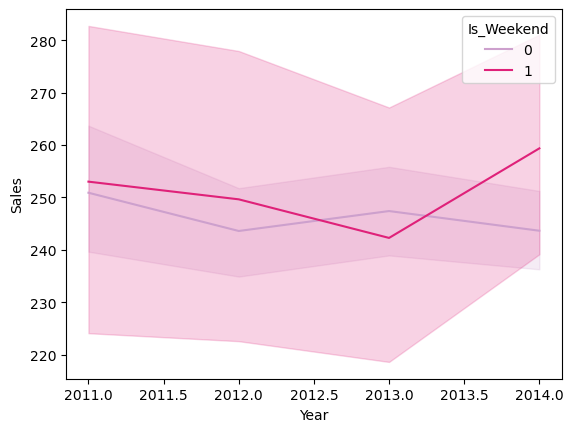

In [231]:
sns.lineplot(x='Year',y='Sales' ,data=sales ,hue='Is_Weekend',palette="PuRd")
plt.show()

# it seems that sales are higher on weekends v

C:\Users\Nouran\AppData\Local\Temp\ipykernel_2136\2958840656.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season' ,y='Sales' ,data=sales , estimator=sum,palette="PuRd")


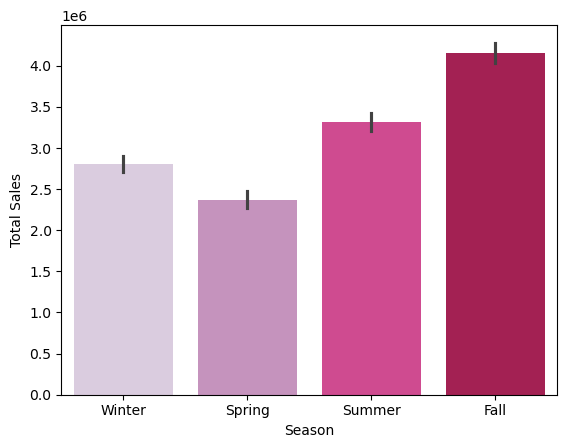

In [235]:
sns.barplot(x='Season' ,y='Sales' ,data=sales , estimator=sum,palette="PuRd")
plt.ylabel('Total Sales')
plt.show()

# it seems that sales are higher in the Fall season

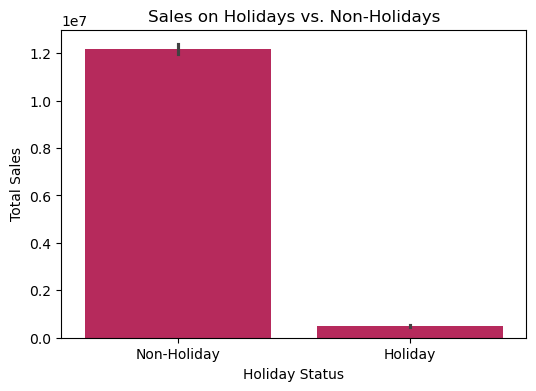

In [193]:
plt.figure(figsize=(6,4))
sns.barplot(x="Is_Holiday", y="Sales", data=sales, estimator=sum, color="#ce1256")
plt.title("Sales on Holidays vs. Non-Holidays")
plt.xlabel("Holiday Status")
plt.ylabel("Total Sales")
plt.xticks([0, 1], ["Non-Holiday", "Holiday"])
plt.show()


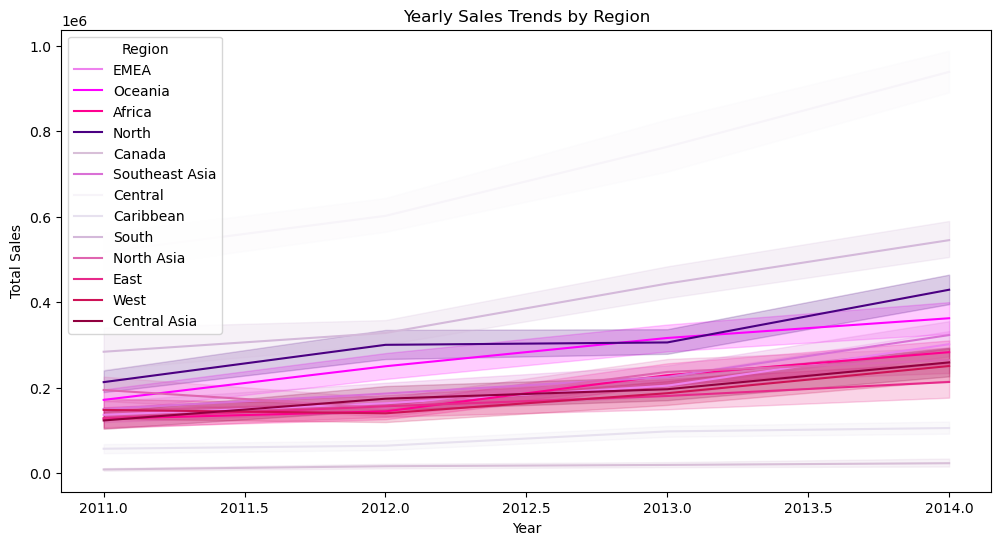

In [90]:
plt.figure(figsize=(12,6))
custom_palette = ["#EE82EE", "#FF00FF", "#FF0090", "#4B0082", "#D8BFD8", "#DA70D6",
          "#f7f4f9", "#e7e1ef", "#d4b9da", "#df65b0", "#e7298a", "#ce1256", "#91003f"]
 
sns.lineplot(x="Year", y="Sales", hue="Region", data=sales, estimator=sum, palette=custom_palette)
plt.title("Yearly Sales Trends by Region")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.legend(title="Region")
plt.show()


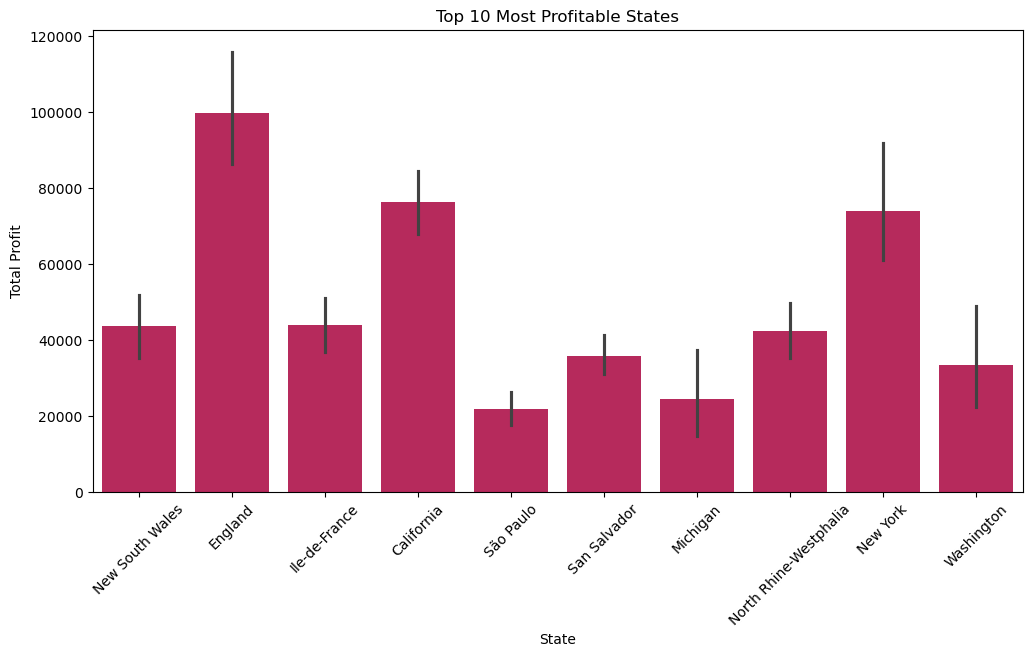

In [191]:
plt.figure(figsize=(12,6))
top_states = sales.groupby("State")["Profit"].sum().nlargest(10).index  # Top 10 profitable states
sns.barplot(x="State", y="Profit", data=sales[sales["State"].isin(top_states)], estimator=sum, color="#ce1256")
plt.xticks(rotation=45)
plt.title("Top 10 Most Profitable States")
plt.xlabel("State")
plt.ylabel("Total Profit")
plt.show()


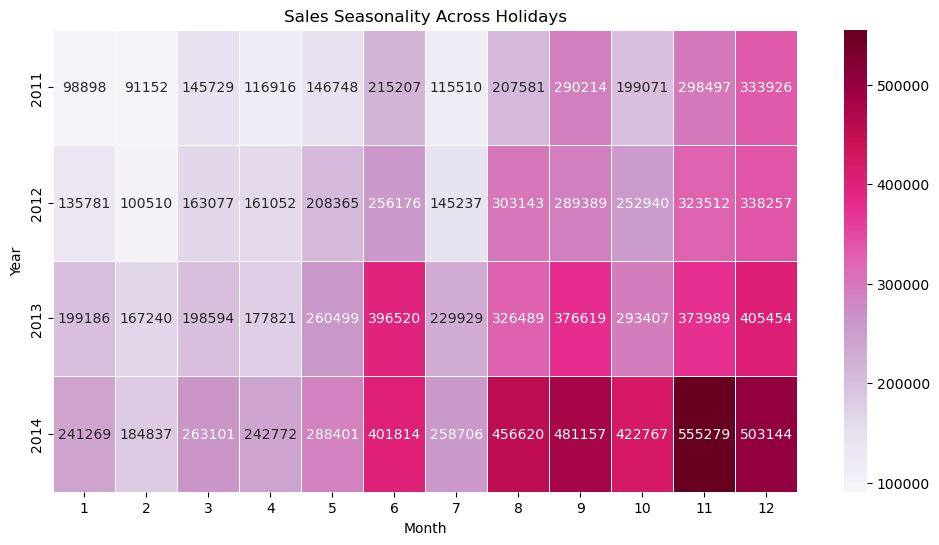

In [93]:
pivot_table = sales.pivot_table(values="Sales", index="Year", columns="Month", aggfunc="sum")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="PuRd", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Sales Seasonality Across Holidays")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


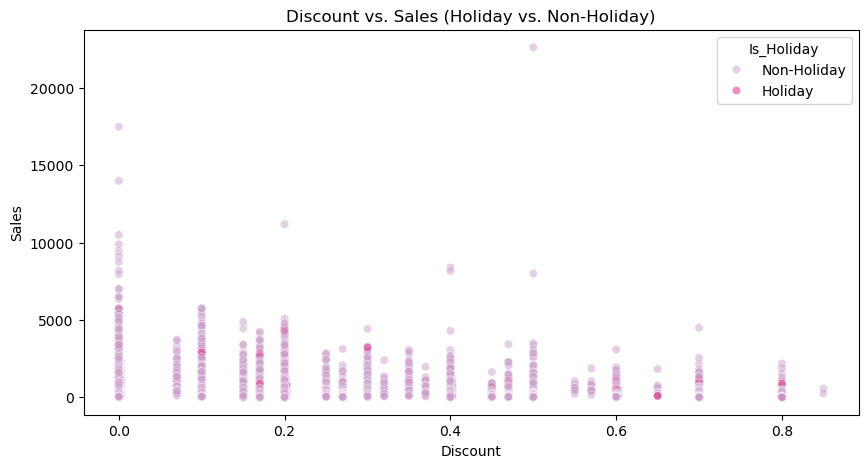

In [95]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Discount", y="Sales", hue=sales["Is_Holiday"].map({0: "Non-Holiday", 1: "Holiday"}), data=sales, alpha=0.5, palette="PuRd")
plt.title("Discount vs. Sales (Holiday vs. Non-Holiday)")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.show()



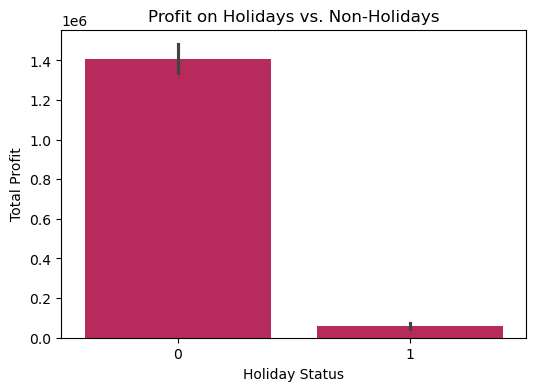

In [189]:
plt.figure(figsize=(6,4))
sns.barplot(x=sales["Is_Holiday"], y=sales["Profit"], estimator=sum, color="#ce1256")
plt.title("Profit on Holidays vs. Non-Holidays")
plt.xlabel("Holiday Status")
plt.ylabel("Total Profit")
plt.show()


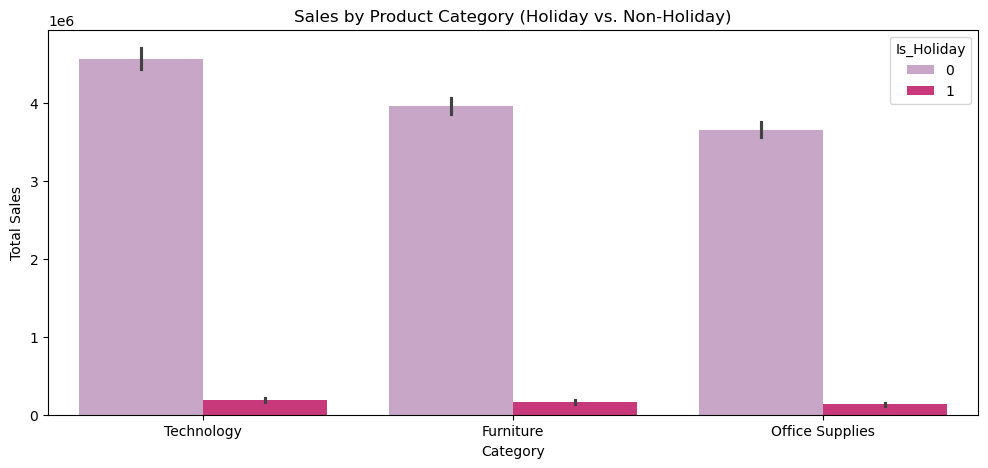

In [101]:
plt.figure(figsize=(12,5))
sns.barplot(x="Category", y="Sales", hue="Is_Holiday", data=sales, estimator=sum, palette="PuRd")
plt.title("Sales by Product Category (Holiday vs. Non-Holiday)")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


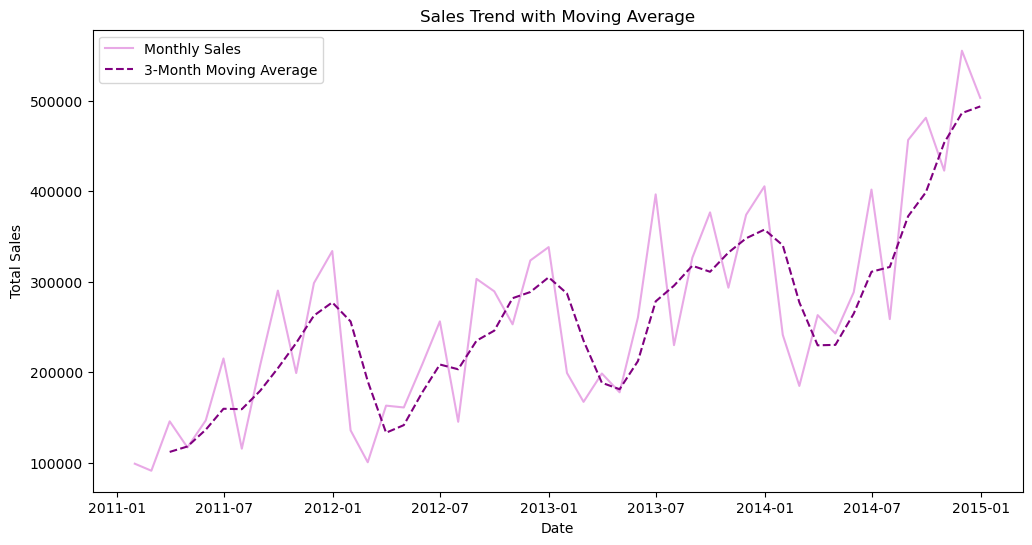

In [119]:

sales["Order Date"] = pd.to_datetime(sales["Order Date"])
sales.set_index("Order Date", inplace=True)
# using ME instead of M 
sales_trend = sales["Sales"].resample("ME").sum()
rolling_avg = sales_trend.rolling(window=3).mean()

# Plot sales trend
plt.figure(figsize=(12,6))
plt.plot(sales_trend, label="Monthly Sales", color="orchid", alpha=0.6)
plt.plot(rolling_avg, label="3-Month Moving Average", color="purple", linestyle="dashed")
plt.title("Sales Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()



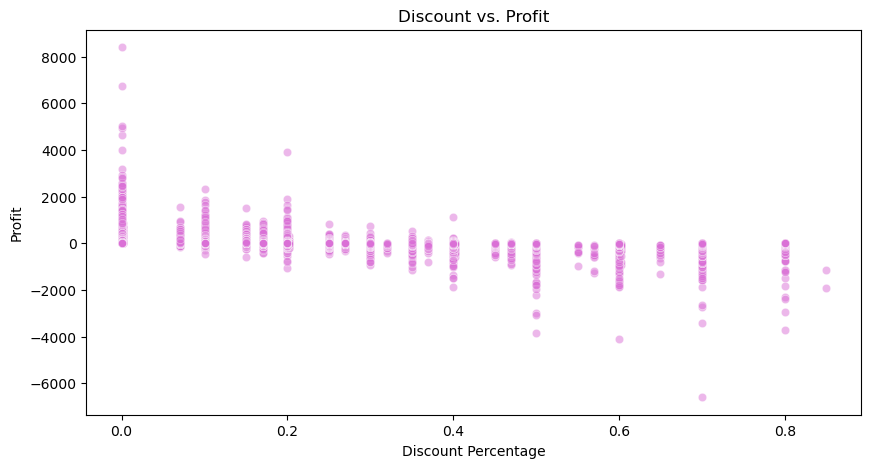

In [121]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Discount", y="Profit", data=sales, alpha=0.5, color="orchid")
plt.title("Discount vs. Profit")
plt.xlabel("Discount Percentage")
plt.ylabel("Profit")
plt.show()


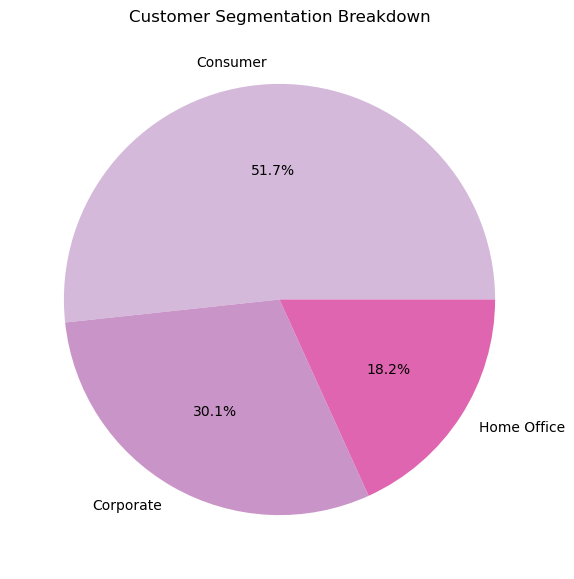

In [147]:
customer_segments = sales["Segment"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(customer_segments, labels=customer_segments.index, autopct='%1.1f%%', colors=[ "#d4b9da", "#c994c7", "#df65b0"])
plt.title("Customer Segmentation Breakdown")
plt.show()


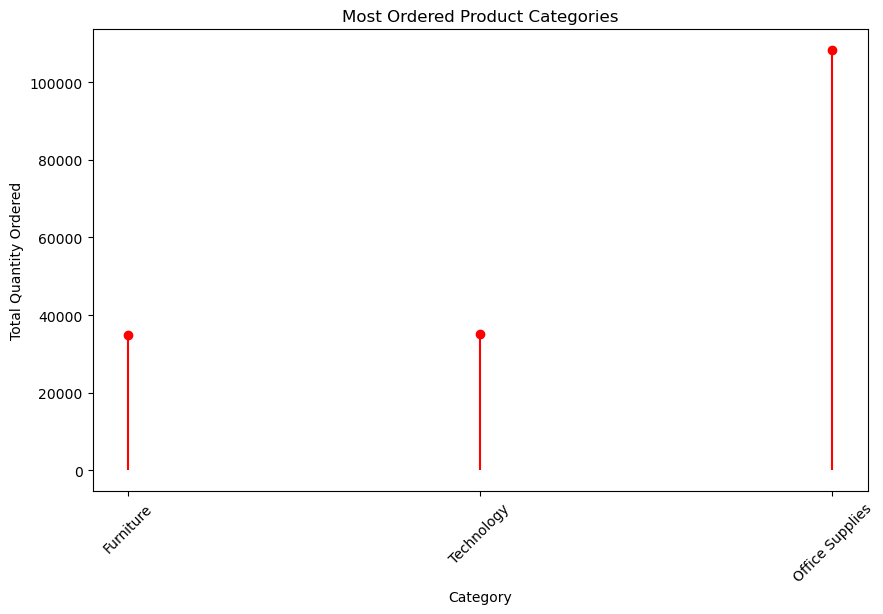

In [147]:
category_sales = sales.groupby("Category")["Quantity"].sum().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.stem(category_sales.index, category_sales.values, basefmt=" ", linefmt="r-", markerfmt="ro")
plt.title("Most Ordered Product Categories")
plt.xlabel("Category")
plt.ylabel("Total Quantity Ordered")
plt.xticks(rotation=45)
plt.show()


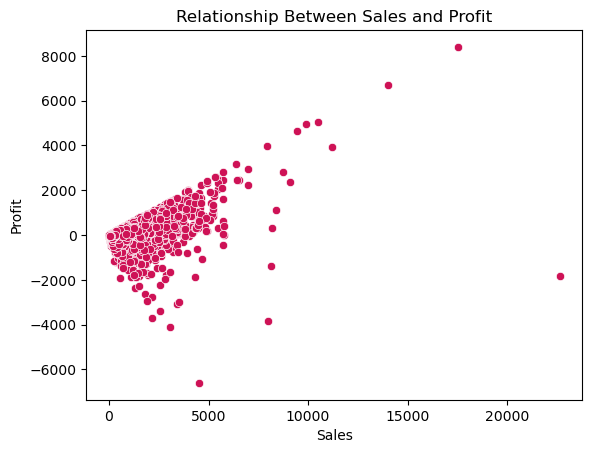

In [151]:
sns.scatterplot(x = sales['Sales'], y = sales['Profit'], color = "#ce1256")
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Relationship Between Sales and Profit')
plt.show()

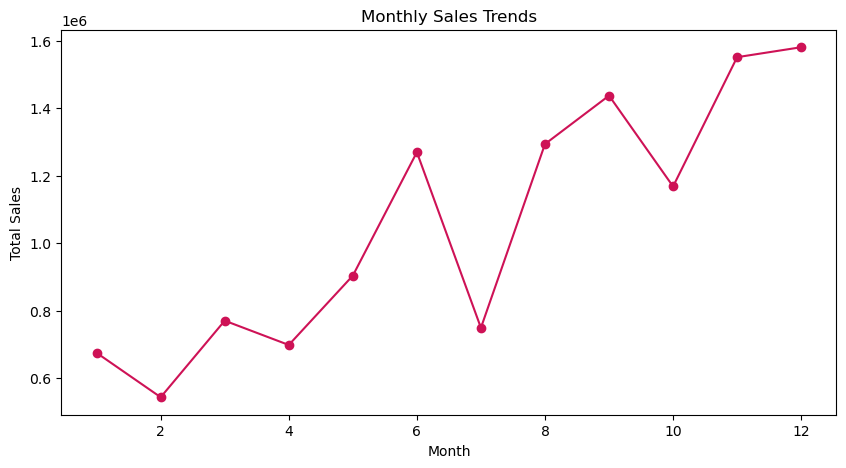

In [153]:
monthly_sales = sales.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o', linestyle='-', color='#ce1256')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.show()

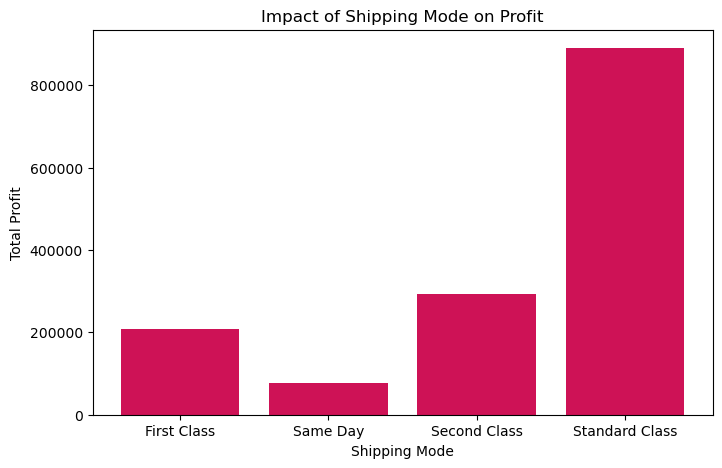

In [187]:
shipping_profit = sales.groupby('Ship Mode')['Profit'].sum()
plt.figure(figsize=(8, 5))
plt.bar(shipping_profit.index, shipping_profit.values, color ="#ce1256")
plt.xlabel('Shipping Mode')
plt.ylabel('Total Profit')
plt.title('Impact of Shipping Mode on Profit')
plt.show()

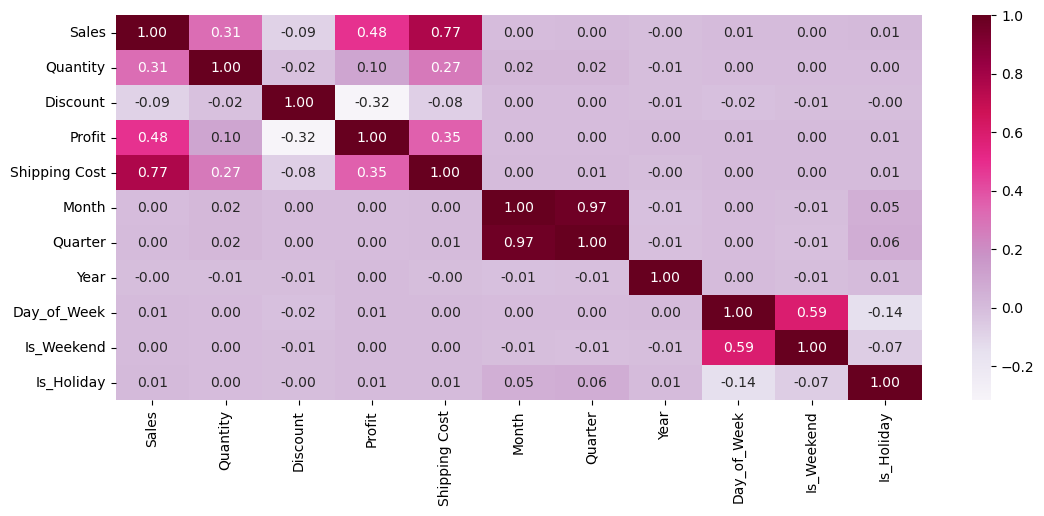

In [173]:
num_cols = sales.select_dtypes(include='number')
plt.figure(figsize=(13,5))
sns.heatmap(num_cols.corr(), annot=True ,fmt='.2f',cmap="PuRd")
plt.show()


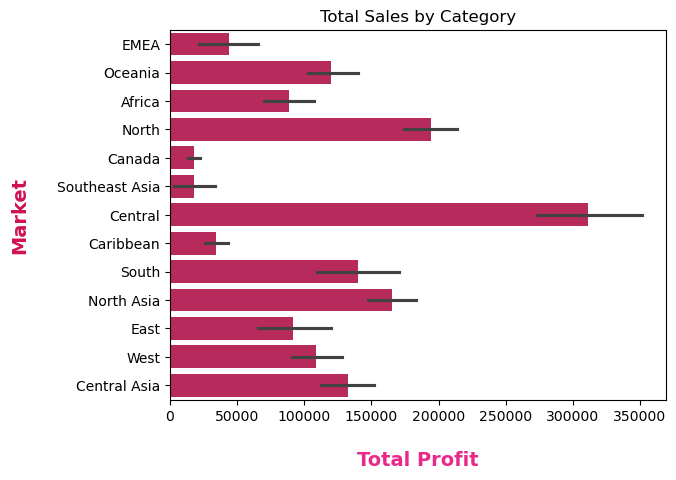

In [229]:
sns.barplot(y='Region' ,x='Profit' ,data=sales ,
            estimator=sum,color="#ce1256")

plt.title('Total Sales by Category')
plt.xlabel('Total Profit', weight = "bold", color = "#e7298a", fontsize = 14, labelpad = 20)
plt.ylabel('Market', weight = "bold", color = "#ce1256", fontsize = 14, labelpad = 20);
plt.show()

# Technology sales is higher than other categoires In most countries